```markdown
# Seaborn Practice Questions (Moderate to Hard)

## 1. Age Distribution by Gender with KDE

- What insights can you draw about the age distribution for males vs. females?

## 2. Gender Proportion in the Dataset

- What percentage of the dataset consists of male vs. female passengers?

## 3. Top 10 Nationalities with Most Passengers

- Which nationality is the most frequent, and how significant is the difference compared to others?

## 4. Flight Status Distribution Across Nationalities

- Do specific nationalities experience more delays?

## 5. Box Plot of Age by Gender

- Are there any significant outliers in either gender?

## 6. Correlation Between Numerical Features

- What patterns can you identify?

## 7. Scatter Plot of Age vs. Airport Continent

- Do certain continents attract older or younger passengers?

## 8. Flight Status and Age Distribution

- Do delayed flights have a different age distribution compared to on-time flights?

## 9. Kernel Density Estimate (KDE) of Age by Gender

- How do the distributions differ?

## 10. Pair Plot of Key Features with Flight Status Hue

- Do you notice any relationships between age and flight delays?
```


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt        

In [2]:
Data = pd.read_csv("Airline Dataset.csv")

In [3]:
Data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

# 01

<Axes: xlabel='Age', ylabel='Density'>

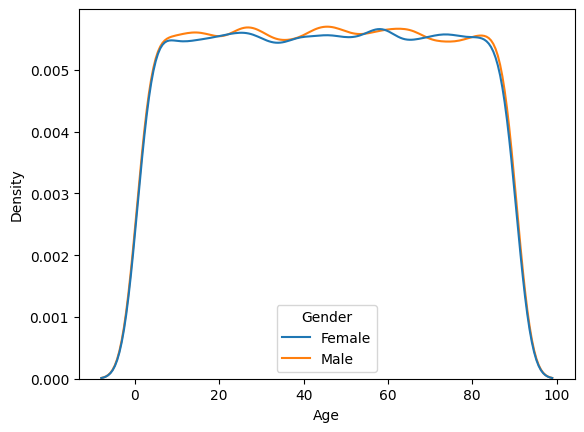

In [6]:
sns.kdeplot(data=Data , x="Age" , hue="Gender")

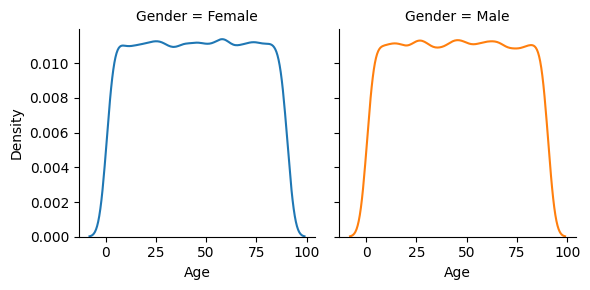

In [ ]:
Age_Gender = sns.FacetGrid(Data , col="Gender" , hue="Gender")

Age_Gender.map_dataframe(sns.kdeplot , data=Data , x="Age")

# 02

<Axes: xlabel='Gender', ylabel='percent'>

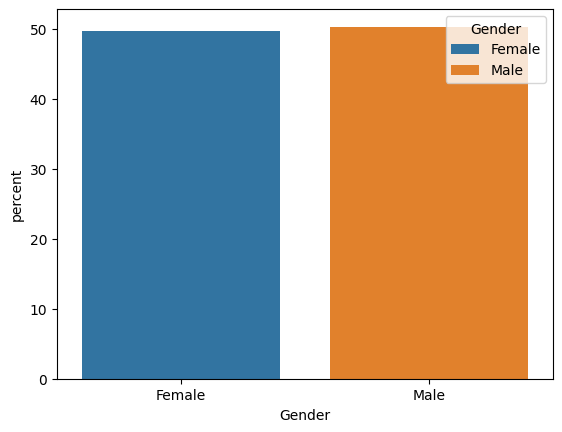

In [26]:
sns.countplot(data=Data , x="Gender" , stat="percent" , hue="Gender" , legend=True)


In [14]:
Gender_Age = Data["Gender"].value_counts()
Gender_Age

Gender
Male      49598
Female    49021
Name: count, dtype: int64

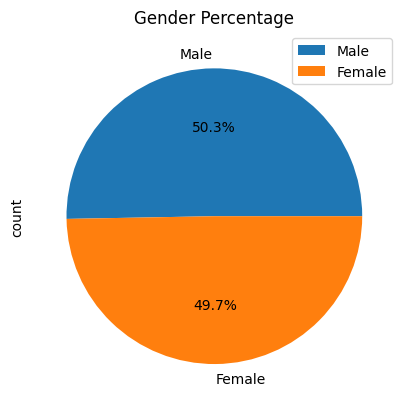

In [19]:
Gender_Age.plot(kind="pie" , autopct="%1.1f%%")

plt.legend()
plt.title("Gender Percentage")
plt.show()

# 03

In [4]:
Nationalities = Data.groupby("Nationality")["Passenger ID"].count()

Top_10 = Nationalities.sort_values(ascending=False).head(10)

Top_10_Nations = pd.DataFrame(Top_10)
Top_10_Nations

,Passenger ID
Nationality,
China,18317
Indonesia,10559
Russia,5693
Philippines,5239
Brazil,3791
Portugal,3299
Poland,3245
France,2907
Sweden,2397


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Indonesia'),
  Text(2, 0, 'Russia'),
  Text(3, 0, 'Philippines'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'Poland'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'United States')])

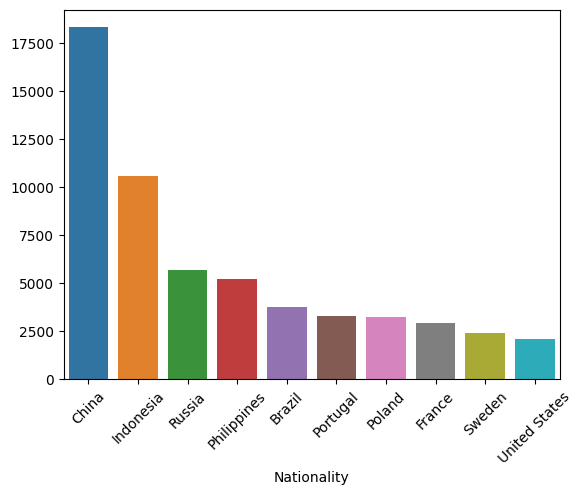

In [5]:
sns.barplot(data=Top_10_Nations , x=Top_10.index , y=Top_10.values , hue=Top_10.index)

plt.xticks(rotation=45)

<Axes: ylabel='Passenger ID'>

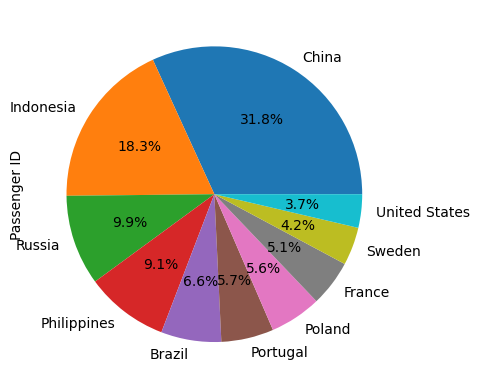

In [6]:
Top_10.plot(kind="pie" , autopct = "%1.1f%%")

# 04

In [23]:
top_nationalities = Data['Nationality'].value_counts().nlargest(10).index

# Filter dataset to include only these nationalities
filtered_df = Data[Data['Nationality'].isin(top_nationalities)]
filtered_df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
11,sBf524,Briant,De La Haye,Male,71,Russia,Ruben Cantu Airport,PA,Panama,NAM,North America,02-06-2022,SYP,Alina Flooks,Delayed


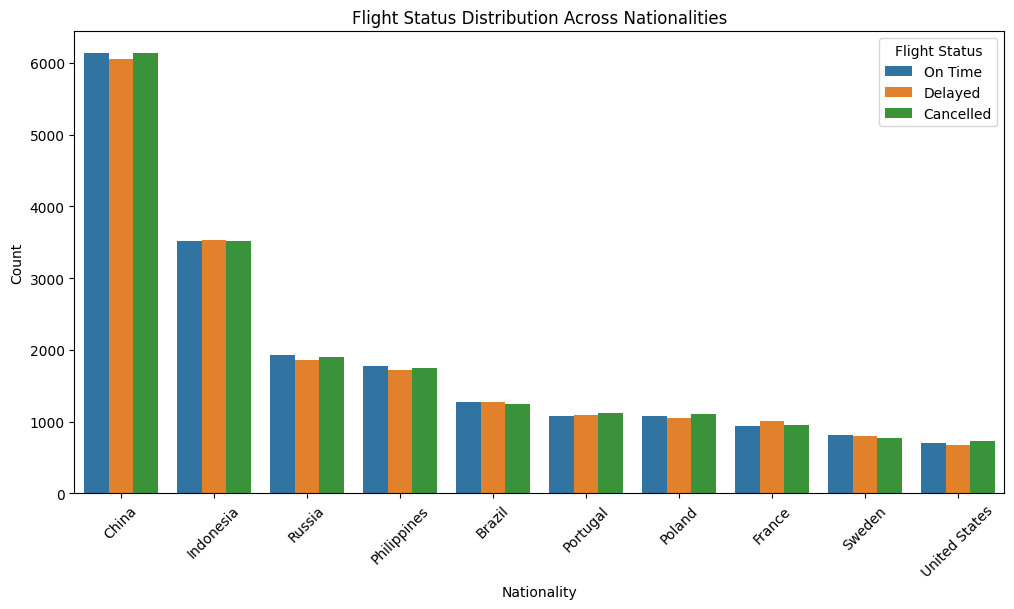

In [22]:
# Plot the count of Flight Status for each Nationality
plt.figure(figsize=(12, 6))
sns.countplot(x='Nationality', hue='Flight Status', data=filtered_df, order=top_nationalities)
plt.xticks(rotation=45)
plt.title("Flight Status Distribution Across Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.legend(title="Flight Status")
plt.show()

# 05

<Axes: xlabel='Gender'>

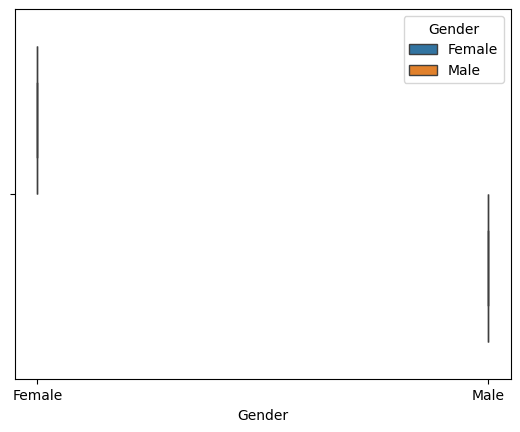

In [25]:
sns.boxplot(data=Data , x="Gender" , hue="Gender")

# 06

In [26]:
numerical_data = Data.select_dtypes(include=['number'])
numerical_data.head()

,Age
0,62
1,62
2,67
3,71
4,21


<Axes: >

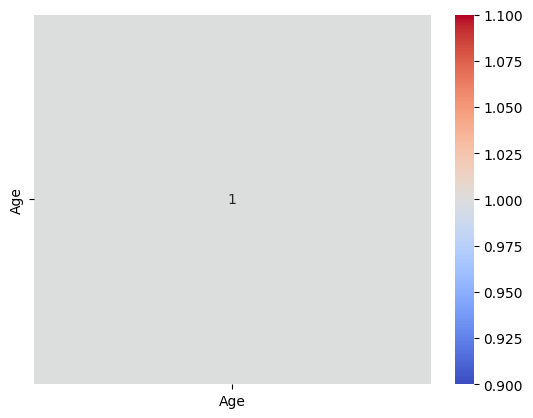

In [28]:
Correlation = numerical_data.corr()

sns.heatmap(Correlation , annot=True , cmap="coolwarm")

# 07

<Axes: xlabel='Airport Continent', ylabel='Age'>

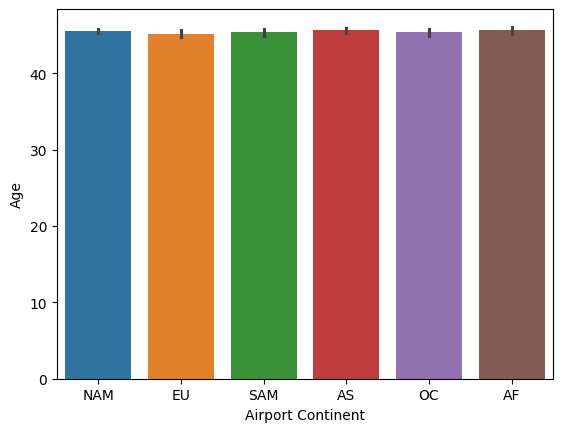

In [10]:
sns.barplot(data=Data , x="Airport Continent" , y="Age" , hue="Airport Continent" , estimator="mean")